<a href="https://colab.research.google.com/github/BrockH3/Intro_to_ml/blob/main/Homework2_Hunter_Brock_801179909.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

url='/content/drive/My Drive/Intro to ML/datasets/Housing.csv'
housing=pd.DataFrame(pd.read_csv(url))     #import dataset with named headers
housing.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [252]:
variables =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#defining map function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'yes': 1, 'no': 0,})

housing[variables] = housing[variables].apply(binary_map)         #applying it to variable list
housing = housing.drop(columns = 'furnishingstatus')              #housing holds all values in csv file

housing_1 = housing.drop(columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'])   #removes variables for part a


In [253]:
#1.a
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_val = train_test_split(housing_1, train_size = 0.7, test_size = 0.3, random_state = 100)

y_train = df_train.pop('price')       #set y_train to price
X_train = df_train                    #set x_train to the rest of the set

y_val = df_val.pop('price')
X_val = df_val


In [254]:

alpha = 0.01            #learning rate
iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# initial values
theta = np.zeros(6)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = (2/m_train) * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


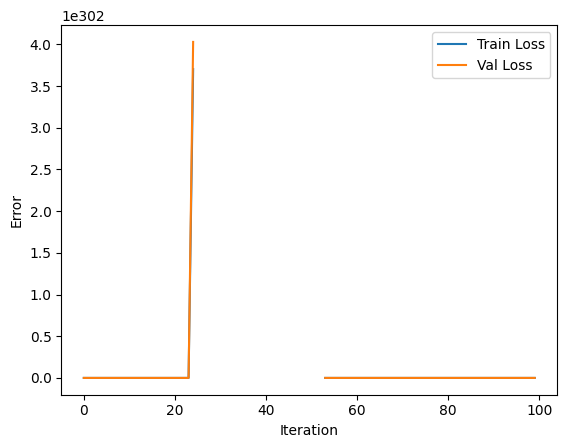

In [255]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

In [256]:

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_val = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

y_train = df_train.pop('price')       #set y_train to price
X_train = df_train                    #set x_train to the rest of the set

y_val = df_val.pop('price')
X_val = df_val

In [257]:
#1.b
alpha = 0.01            #learning rate
iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# initial values
theta = np.zeros(12)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = (2/m_train) * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta = theta - (alpha * gradients)

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)


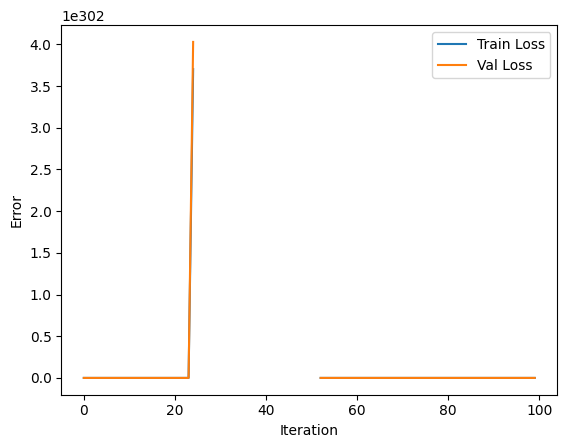

In [258]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

In [259]:
#2.a
#define a train and test set split 70% and 30%
np.random.seed(0)

df_train, df_val = train_test_split(housing_1, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
#scale all numerical variables to fit between 0 and 1
scaler = MinMaxScaler()

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_val[num_vars] = scaler.fit_transform(df_val[num_vars])

y_train = df_train.pop('price')       #set y_train to price
X_train = df_train                    #set x_train to the rest of the set

y_val = df_val.pop('price')
X_val = df_val


In [260]:

alpha = 0.01            #learning rate
iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# initial values
theta = np.zeros(6)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = (2/m_train) * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta = theta - (alpha * gradients)

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)


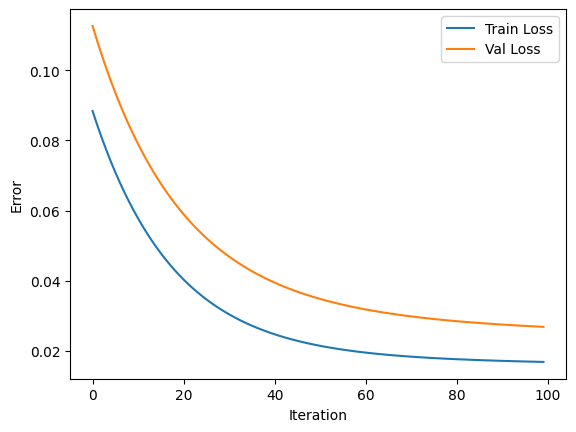

In [261]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

In [262]:
#2.b
#define a train and test set split 70% and 30%
np.random.seed(0)

df_train, df_val = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

#scale all numerical variables to fit between 0 and 1
scaler = MinMaxScaler()

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_val[num_vars] = scaler.fit_transform(df_val[num_vars])

y_train = df_train.pop('price')       #set y_train to price
X_train = df_train                    #set x_train to the rest of the set

y_val = df_val.pop('price')
X_val = df_val

In [263]:
alpha = 0.01            #learning rate
iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# initial values
theta = np.zeros(12)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = (2/m_train) * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta = theta - (alpha * gradients)

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)


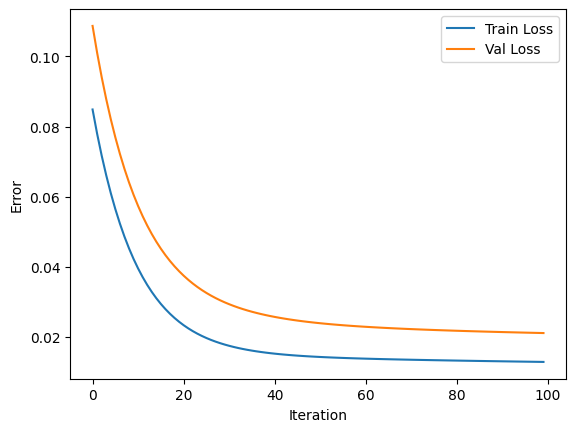

In [264]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

In [265]:
#3.a
#define a train and test set split 70% and 30%
np.random.seed(0)

df_train, df_val = train_test_split(housing_1, train_size = 0.7, test_size = 0.3, random_state = 100)

#scale all numerical variables to fit between 0 and 1
scaler = MinMaxScaler()

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_val[num_vars] = scaler.fit_transform(df_val[num_vars])

y_train = df_train.pop('price')       #set y_train to price
X_train = df_train                    #set x_train to the rest of the set

y_val = df_val.pop('price')
X_val = df_val

In [266]:
alpha = 0.01            #learning rate
l = 1
iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# initial values
theta = np.zeros(6)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = (2/m_train) * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta = (theta*(1-alpha/m_train)) - (alpha * gradients)

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)


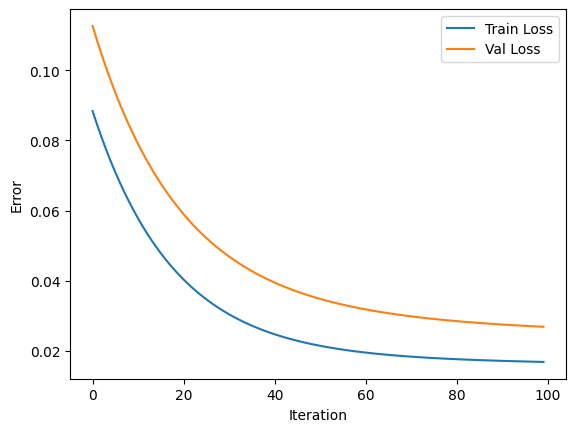

In [267]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()

In [268]:
#3.b
#define a train and test set split 70% and 30%
np.random.seed(0)

df_train, df_val = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

#scale all numerical variables to fit between 0 and 1
scaler = MinMaxScaler()

num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_val[num_vars] = scaler.fit_transform(df_val[num_vars])

y_train = df_train.pop('price')       #set y_train to price
X_train = df_train                    #set x_train to the rest of the set

y_val = df_val.pop('price')
X_val = df_val

In [269]:
alpha = 0.01            #learning rate
l = 1
iterations = 100
m_train = len(X_train)
m_val = len(X_val)

# initial values
theta = np.zeros(12)

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(iterations):
    gradients = (2/m_train) * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta = (theta*(1-alpha/m_train)) - (alpha * gradients)                     #altered with penalty

    train_loss = (1/m_train) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/m_val) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)


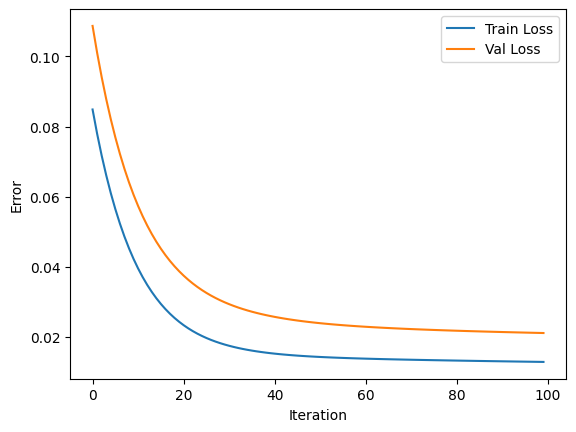

In [270]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.legend()
plt.show()